### Algorithm
1. Create a NxN sparse matrix with M[i,j] if page_i links to page_j else 0+epislon ( to prevent cycles / reducibility ) 
1. Normalize so each row sums to 1 ( i.e. create a stochastic matrix ) 
1. Build reverse index

In [57]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np

In [1]:
datadir = "../data/pages/"

In [6]:
import os
import re

In [4]:
fnames = os.listdir(datadir)

In [25]:
sre = re.compile("<a href=\"http://(.*?)\">")
links = {}

In [26]:
for fname in fnames:
    links.setdefault(fname, [])
    with open(os.path.join(datadir, fname)) as f:
        page_data = f.read()
        for m in sre.finditer(page_data):
            links[fname].append(m.group(1))
links

{'angelinajolie.html': ['jonvoight.html', 'bradpitt.html'],
 'bradpitt.html': ['jenniferaniston.html',
  'angelinajolie.html',
  'martinscorcese.html',
  'angelinajolie.html'],
 'jenniferaniston.html': [],
 'jonvoight.html': ['angelinajolie.html',
  'angelinajolie.html',
  'bradpitt.html'],
 'martinscorcese.html': [],
 'robertdeniro.html': ['martinscorcese.html']}

In [31]:
import networkx as nx
from collections import Counter

In [34]:
DG = nx.DiGraph()
DG.add_nodes_from(links.keys())

edges = []
for k, vals in links.iteritems():
    eweight = Counter(vals)
    for succ, weight in eweight.iteritems():
        edges.append([k, succ, {'weight': weight}])
DG.add_edges_from(edges)

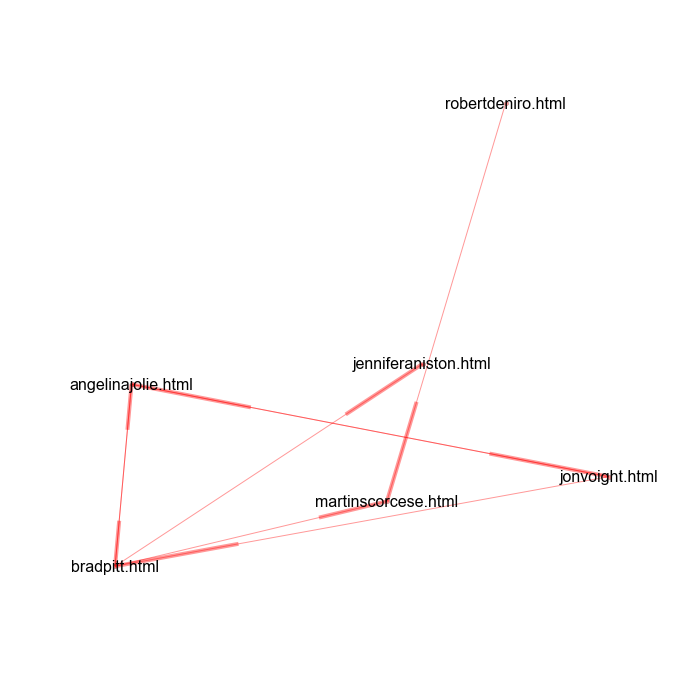

In [40]:
# visualizing the graph
plt.figure(figsize=(9,9))
pos = nx.spring_layout(DG, iterations=10)
nx.draw(DG, pos, node_size=20, alpha=0.4, edge_color='r', font_size=16, with_labels=True)
plt.show()

In [44]:
# Transition Matrix
N = len(fnames)
T = np.zeros((N, N))
T

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [45]:
file_to_index_map = dict((fn, i) for i, fn in enumerate(fnames))
file_to_index_map

{'angelinajolie.html': 0,
 'bradpitt.html': 1,
 'jenniferaniston.html': 2,
 'jonvoight.html': 3,
 'martinscorcese.html': 4,
 'robertdeniro.html': 5}

In [50]:
for pred, succ in DG.adj.iteritems():
    for s, edata in succ.iteritems():
        T[file_to_index_map[pred], file_to_index_map[s]] = edata['weight']
T

array([[ 0.,  1.,  0.,  1.,  0.,  0.],
       [ 2.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.]])

In [99]:
# L  = T + epsilon.E
epsilon = 0.01
E = np.ones(T.shape)/N

# !!element-wise operation
L = T + epsilon * E

# normalize
G = np.zeros(L.shape)
for i in xrange(N):
    # divide i_th row by it's sum
    G[i,:] = L[i, :] / sum(L[i,:])
G

array([[  8.29187396e-04,   4.98341625e-01,   8.29187396e-04,
          4.98341625e-01,   8.29187396e-04,   8.29187396e-04],
       [  4.99168745e-01,   4.15627598e-04,   2.49792186e-01,
          4.15627598e-04,   2.49792186e-01,   4.15627598e-04],
       [  1.66666667e-01,   1.66666667e-01,   1.66666667e-01,
          1.66666667e-01,   1.66666667e-01,   1.66666667e-01],
       [  6.65005537e-01,   3.32779623e-01,   5.53709856e-04,
          5.53709856e-04,   5.53709856e-04,   5.53709856e-04],
       [  1.66666667e-01,   1.66666667e-01,   1.66666667e-01,
          1.66666667e-01,   1.66666667e-01,   1.66666667e-01],
       [  1.65016502e-03,   1.65016502e-03,   1.65016502e-03,
          1.65016502e-03,   9.91749175e-01,   1.65016502e-03]])

In [60]:
# E.g. of Aperiodicity
bad_G = np.array([[0,1],[1,0]])
pi = np.array([1/3, 2/3])
for x in xrange(10):
    print x, "before", pi
    pi = np.dot(pi, bad_G)
    print x, "after", pi
    print
# periodicity :)

0 before [ 0.33333333  0.66666667]
0 after [ 0.66666667  0.33333333]

1 before [ 0.66666667  0.33333333]
1 after [ 0.33333333  0.66666667]

2 before [ 0.33333333  0.66666667]
2 after [ 0.66666667  0.33333333]

3 before [ 0.66666667  0.33333333]
3 after [ 0.33333333  0.66666667]

4 before [ 0.33333333  0.66666667]
4 after [ 0.66666667  0.33333333]

5 before [ 0.66666667  0.33333333]
5 after [ 0.33333333  0.66666667]

6 before [ 0.33333333  0.66666667]
6 after [ 0.66666667  0.33333333]

7 before [ 0.66666667  0.33333333]
7 after [ 0.33333333  0.66666667]

8 before [ 0.33333333  0.66666667]
8 after [ 0.66666667  0.33333333]

9 before [ 0.66666667  0.33333333]
9 after [ 0.33333333  0.66666667]



In [102]:
# back to pagerank
pi = np.random.randn(N)
pi = pi / sum(pi)
R = pi
for _ in xrange(100):
    R = np.dot(R, G)
print sorted(zip(fnames, R), key=lambda x:x[1], reverse=True)

[('angelinajolie.html', 0.28510694845512985), ('bradpitt.html', 0.24423314089667664), ('jonvoight.html', 0.18332712072294183), ('martinscorcese.html', 0.14346103423114387), ('jenniferaniston.html', 0.10238888793392545), ('robertdeniro.html', 0.041482867760190618)]


In [119]:
pi = np.random.randn(N)
pi = pi / sum(pi)
evolution = [np.dot(pi, np.linalg.matrix_power(G, i)) for i in xrange(1,20)]

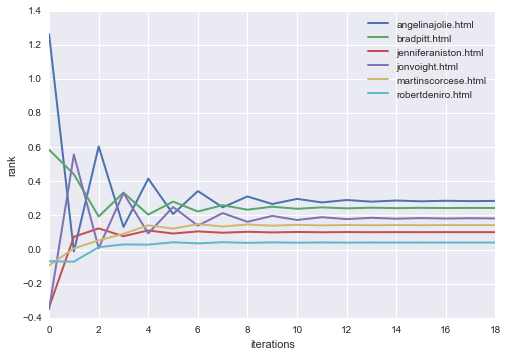

In [120]:
# convergence
plt.figure()

for i in xrange(N):
    plt.plot([step[i] for step in evolution], label=fnames[i], lw=2)

plt.xlabel("iterations")
plt.ylabel("rank")
plt.legend()
plt.draw()


In [121]:
np.linalg.eigvals(np.linalg.matrix_power(G,100))

array([  0.00000000e+00 +0.00000000e+00j,
         1.00000000e+00 +0.00000000e+00j,
         2.90941038e-17 +1.48842326e-17j,
         2.90941038e-17 -1.48842326e-17j,
         5.47959172e-18 +0.00000000e+00j,  -2.88047486e-35 +0.00000000e+00j])

In [129]:
# reverse index
reverse_index = {}
for fname in fnames:
    with open(os.path.join(datadir, fname)) as f:
        for line in f:
            for token in line.split():
                reverse_index.setdefault(token, Counter())
                reverse_index[token][fname]+=1
reverse_index['film']


Counter({'angelinajolie.html': 3,
         'bradpitt.html': 3,
         'jenniferaniston.html': 1,
         'jonvoight.html': 1,
         'martinscorcese.html': 5,
         'robertdeniro.html': 1})

In [134]:
def get_page_rank(fname):
    return R[file_to_index_map[fname]]

In [135]:
def get_ordered_results(keyword):
    results = reverse_index.get(keyword, [])
    if not results:
        return []
    return sorted(results, key=get_page_rank, reverse=True)

In [143]:
get_ordered_results('starred')

['angelinajolie.html',
 'bradpitt.html',
 'jonvoight.html',
 'jenniferaniston.html']